In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

In [12]:
ds_ifs_0614_m1 = xr.open_dataset('/pfs/work7/workspace/scratch/gj5173-ws_ai_models/ifs/20210614/forecasts/fcnv2_fc_ifs_20210614_0000_m1.nc' ,engine='netcdf4')

In [13]:
ds_ifs_0614_m1 

<xarray.Dataset>
Dimensions:   (time: 60, lon: 1440, lat: 721, height: 1, height_2: 1,
               height_3: 1, plev: 13)
Coordinates:
  * time      (time) datetime64[ns] 2021-06-14T06:00:00 ... 2021-06-29
  * lon       (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * height    (height) float64 10.0
  * height_2  (height_2) float64 100.0
  * height_3  (height_3) float64 2.0
  * plev      (plev) float64 5e+03 1e+04 1.5e+04 ... 8.5e+04 9.25e+04 1e+05
Data variables: (12/13)
    10u       (time, height, lat, lon) float32 ...
    10v       (time, height, lat, lon) float32 ...
    u         (time, height_2, lat, lon) float32 ...
    v         (time, height_2, lat, lon) float32 ...
    2t        (time, height_3, lat, lon) float32 ...
    sp        (time, lat, lon) float32 ...
    ...        ...
    tciwv     (time, lat, lon) float32 ...
    u_2       (time, plev, lat, lon) float32 ...
    v_2       (time, plev, lat, lon) float32 ...
    z         (time, plev, lat, lon) float32 ...
    t         (time, plev, lat, lon) float32 ...
    r         (time, plev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Sun Jan 14 16:57:28 2024: cdo -f nc copy /pfs/work7/workspa...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [14]:
ds_ifs_0614_m1 ['2t'][:,0,40:261,720:1201]

<xarray.DataArray '2t' (time: 60, lat: 221, lon: 481)>
[6378060 values with dtype=float32]
Coordinates:
  * time      (time) datetime64[ns] 2021-06-14T06:00:00 ... 2021-06-29
  * lon       (lon) float32 180.0 180.2 180.5 180.8 ... 299.2 299.5 299.8 300.0
  * lat       (lat) float32 80.0 79.75 79.5 79.25 79.0 ... 25.75 25.5 25.25 25.0
    height_3  float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      2 metre temperature
    units:          K
    param:          0.0.0

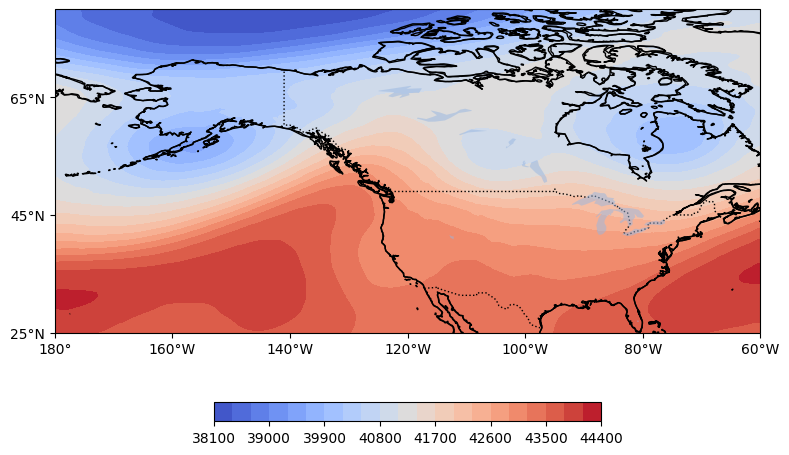

In [40]:
 
lat = np.linspace(25, 80, 221)
lon = np.linspace(-180, -60, 481)
lon_grid, lat_grid = np.meshgrid(lon, lat)
x, y = lon_grid, lat_grid
# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig3 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())

                  
# Add map features
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')


ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour3 = ax3.contourf(x,y,ds_ifs_0614_m1 ['z'][35,8,261:40:-1,720:1201],cmap='coolwarm',levels=20)
#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour3, ax=ax3,orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
#plt.title('T2m_2021-06-15-00:00UTC_ECMWF')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots/T2m_2021-06-15_ECMWF.png', bbox_inches='tight',dpi=100)
# Show the pl